## Set up Environment

In [1]:
%pip install -q gymnasium numpy matplotlib pygame

import gymnasium as gym
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import clear_output


# https://gymnasium.farama.org/environments/toy_text/taxi/
env = gym.make("Taxi-v3",render_mode="rgb_array")


[notice] A new release of pip is available: 23.2.1 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.


## SARSA

> SARSA（State-Action-Reward-State-Action）和Q-learning在實作上有一些重要的差異。
> 主要區別在於它們如何更新Q表。Q-learning是基於下一狀態的最大獎勵來更新Q值，而SARSA則是基於當前策略選擇的下一個動作來更新Q值。

In [2]:
alpha = 0.1  # learning rate
gamma = 0.6  # discount factor
epsilon = 1  # epsilon_greedy parameter
min_epsilon = 0.01  # Minimum epsilon value
decay_rate = 0.95  # Decay rate for epsilon
num_episodes = 5000

Q_SARSA = np.zeros((env.observation_space.n, env.action_space.n))

In [3]:
actions={
          0:"South",
          1:"North",
          2:"East",
          3:"West",
          4:"Pick Up",
          5:"Drop off"
}

In [4]:
def epsilon_greedy_policy(state, Q):
    if np.random.uniform(0, 1) < epsilon:
        # exploration
        return env.action_space.sample()
    else:
        # exploitation
        return np.argmax(Q[state])

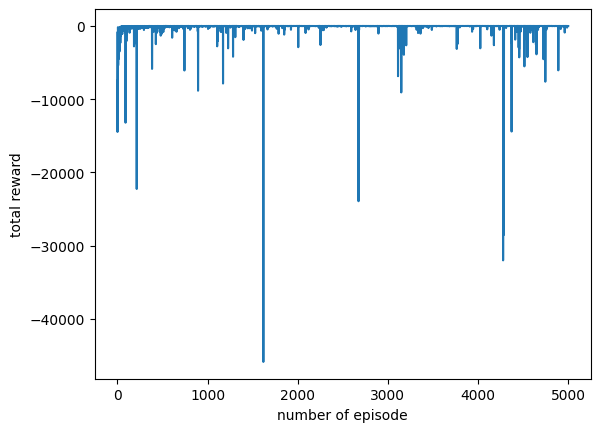

In [5]:
episode_reward_data = []
for episode in range(num_episodes):
    total_reward = 0
    env_info = env.reset()
    state = env_info[0]
    action = epsilon_greedy_policy(state, Q_SARSA)
    done = False

    while done != True:
        next_state, reward, done, _, _ = env.step(action)
        next_action = epsilon_greedy_policy(next_state, Q_SARSA)
        
        total_reward += reward
        
        # update
        Q_SARSA[state, action] = (1-alpha) * Q_SARSA[state, action] + alpha * (reward + gamma * Q_SARSA[next_state, next_action])
        state, action = next_state, next_action
    
    epsilon = max(min_epsilon, epsilon * decay_rate)    
    episode_reward_data.append(total_reward)
    # print(f"total_reward = {total_reward}")

plt.plot(episode_reward_data)
plt.ylabel('total reward')
plt.xlabel('number of episode')
plt.show()

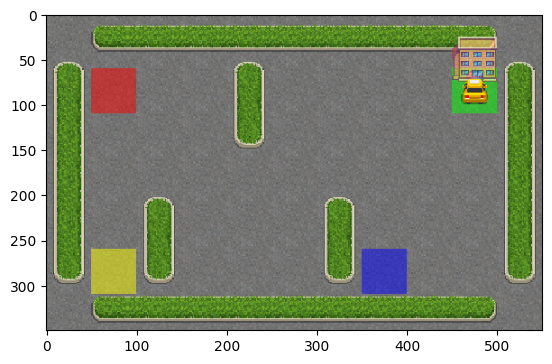

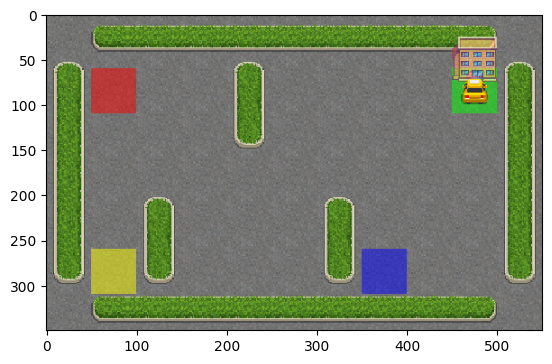

In [6]:
env_info = env.reset()
state = env_info[0]
done = False
num_of_action = 0


while done != True:
    action = np.argmax(Q_SARSA[state])
    state, reward, done, _, _ = env.step(action)
    img = env.render()
    num_of_action += 1
    print(f"number of action = {num_of_action}, action = {actions.get(action)}")
    
    # show action
    clear_output(wait=True) 
    plt.imshow(img)
    display(plt.gcf())